# ***CODE FOR COVID-19 TWITTER SENTIMENT AND MACHINE LEARNING ANALYSIS***

## **SETTING UP ENVIROMENT**

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akshay
[nltk_data]     Kaushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Akshay
[nltk_data]     Kaushal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Akshay
[nltk_data]     Kaushal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Akshay
[nltk_data]     Kaushal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline 

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from textblob import TextBlob
from wordcloud import WordCloud
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")

In [6]:
# supervised learning algorithms
# (K-Nearest Neighbbors, Decision Tree, Random Forest)
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.naive_bayes import MultinomialNB #naive bayes
from sklearn import svm #svm
from sklearn.multiclass import OneVsRestClassifier #svm
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import metrics

# resampling
from imblearn.over_sampling import SMOTE # SMOTE

#Randomized Search
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

#Model performance evaluation (comparison)
from sklearn.metrics import roc_curve
from sklearn.metrics import  roc_auc_score

## **LOADING & DESCRIBING DATA**

In [7]:
#importing data
data1 = pd.read_csv("preda.csv", low_memory=False)
data2 = pd.read_csv("kash.csv", low_memory=False)
data3 = pd.read_csv("yadav.csv", low_memory=False)

In [8]:
data1.shape, data2.shape, data3.shape

((228207, 13), (397598, 13), (43888, 13))

In [9]:
#merging data 1 and data 2 row-wise
data = pd.concat([data1, data2, data3], ignore_index= True)
data.shape

(669693, 13)

In [10]:
#info of merged data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669693 entries, 0 to 669692
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         625784 non-null  object 
 1   user_location     474911 non-null  object 
 2   user_description  587045 non-null  object 
 3   user_created      625779 non-null  object 
 4   user_followers    625757 non-null  float64
 5   user_friends      625757 non-null  object 
 6   user_favourites   625757 non-null  object 
 7   user_verified     625757 non-null  object 
 8   date              625755 non-null  object 
 9   text              625757 non-null  object 
 10  hashtags          514419 non-null  object 
 11  source            623226 non-null  object 
 12  is_retweet        625736 non-null  object 
dtypes: float64(1), object(12)
memory usage: 66.4+ MB


In [11]:
#data description
data.describe()

,user_followers
count,6.257570e+05
mean,7.241378e+04
std,7.478451e+05
min,0.000000e+00
25%,8.600000e+01
50%,4.840000e+02
75%,2.341000e+03
max,1.658379e+07


In [12]:
#missing values per variable
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [13]:
missing_data(data)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,43909,194782,82648,43914,43936,43936,43936,43936,43938,43936,155274,46467,43957
Percent,6.556586,29.085267,12.341177,6.557333,6.560618,6.560618,6.560618,6.560618,6.560917,6.560618,23.185848,6.938552,6.563754
Types,object,object,object,object,float64,object,object,object,object,object,object,object,object


In [14]:
#unique values per variable
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [15]:
unique_values(data)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,625784,474911,587045,625779,625757,625757,625757,625757,625755,625757,514419,623226,625736
Uniques,225648,57398,233009,226219,39858,20015,93708,13,310029,620334,200584,1141,1


## **CLEANING & ORGANIZING DATA**

In [16]:
data.text = data['text'].astype(str)

In [17]:
# function to clean data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [18]:
#Cleaning text
data.text = data['text'].apply(data_processing)

In [19]:
#dropping duplicates
data = data.drop_duplicates('text')

In [20]:
#performing lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatizing (dat):
    tweet = [lemmatizer.lemmatize(word) for word in dat]
    return dat

In [21]:
#applying lemmatization
data['text'] = data['text'].apply(lambda x: lemmatizing(x))

In [22]:
# Selecting important columns
data = data[['user_location', 'text']]
data.head()

,user_location,text
0,"La Crescenta-Montrose, CA",folks said daikon paste could treat cytokine s...
1,"San Francisco, CA",world wrong side history year hopefully bigges...
2,Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"Vancouver, BC - Canada",facts immutable senator even youre ethically s...
4,NaN,explain need vaccine borisjohnson matthancock ...


In [23]:
#specifying countries
countries = ['India', 'USA', 'United Kingdom', 'Canada', 'England']

data = data[data.user_location.isin(countries)]
data.head()

,user_location,text
12,India,agency also released new information health ca...
75,India,ugursahin ozlemtureci muslim scientists husban...
94,India,toronto receive ontarios 1st doses pfizer covi...
100,Canada,pfizerbiontech wondering every pfizer employee...
131,India,approvals pfizerbiontech vaccine singapore app...


## **TEXT ANALYSIS**

In [24]:
#SUBJECTIVITY
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#POLARITY
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity


#COlumns for Subjectivity and Polarity
data['Subjectivity'] = data['text'].apply(getSubjectivity)
data['Polarity'] = data['text'].apply(getPolarity)


In [25]:
#positive, negative, neutral sentiments
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [26]:
data.head()

,user_location,text,Subjectivity,Polarity,Analysis
12,India,agency also released new information health ca...,0.454545,0.136364,Positive
75,India,ugursahin ozlemtureci muslim scientists husban...,0.000000,0.000000,Neutral
94,India,toronto receive ontarios 1st doses pfizer covi...,0.000000,0.000000,Neutral
100,Canada,pfizerbiontech wondering every pfizer employee...,0.000000,0.000000,Neutral
131,India,approvals pfizerbiontech vaccine singapore app...,0.333333,0.250000,Positive


In [27]:
#visualization
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Count & Percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=45, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

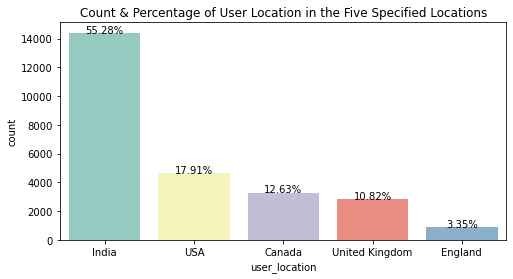

In [28]:
plot_count("user_location", "User Location in the Five Specified Locations", data,2)

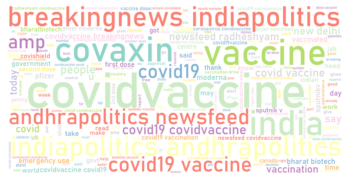

In [29]:
#visualizing
#wordcloud
#from turtle import width
import wordcloud
from wordcloud import STOPWORDS

allWords = ' '.join( [twts for twts in data['text']] )
wordCloud = WordCloud(font_path="C:\\Windows\\Fonts\\Bahnschrift.ttf",
                      width = 1200,
                      height = 600,
                      collocations=True,
                      random_state = 123,
                      colormap='Set3',
                      background_color='white',
                      stopwords=STOPWORDS).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [30]:
data.shape

(26058, 5)

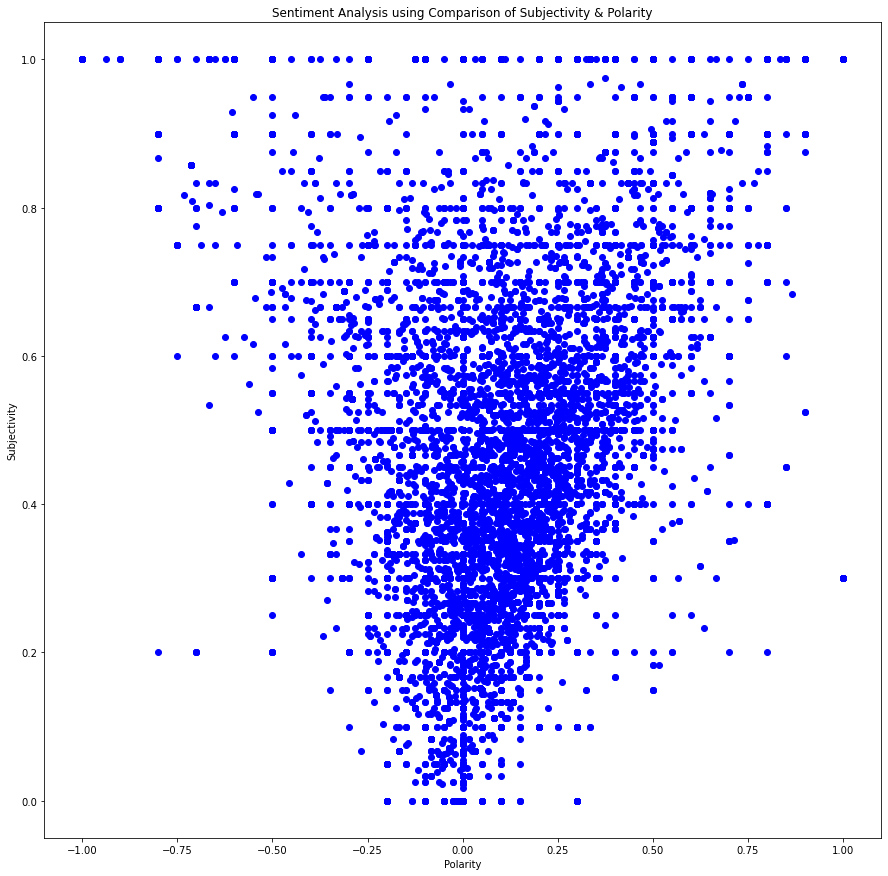

In [31]:
#plot Subjectivity & Polarity
plt.figure(figsize = (15,15))

plt.scatter(data['Polarity'], data['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis using Comparison of Subjectivity & Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
#Percentage of Positive Tweets
positive_tweets = data[data['Analysis'] == 'Positive']
positive_tweets = positive_tweets.text
positive_tweets

percentage_ptweets = round( (len(positive_tweets)/ len(data) * 100), 1)
percentage_ptweets

39.5

In [33]:
#Percentage of Negative Tweets
negative_tweets = data[data['Analysis'] == 'Negative']
negative_tweets = negative_tweets.text
negative_tweets

percentage_ntweets = round( (len(negative_tweets)/ len(data) * 100), 1)
percentage_ntweets

13.0

In [34]:
#Percentage of Neutral Tweets
neutral_tweets = data[data['Analysis'] == 'Neutral']
neutral_tweets = neutral_tweets.text
neutral_tweets

percentage_neutweets = round( (len(neutral_tweets)/ len(data) * 100), 1)
percentage_neutweets

47.5

In [35]:
#visualization
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Count & Percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=45, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

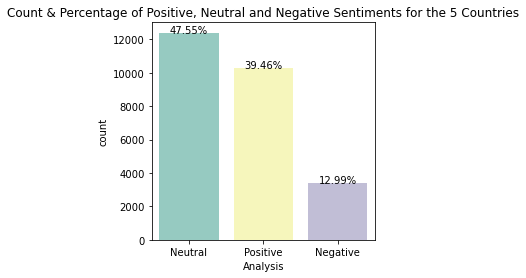

In [36]:
plot_count('Analysis', 'Positive, Neutral and Negative Sentiments for the 5 Countries', data, 1)

In [37]:
negative_data = data[data['Analysis'] == 'Negative']
positive_data = data[data['Analysis'] == 'Positive']
neutral_data = data[data['Analysis'] == 'Neutral']

In [38]:
from wordcloud import STOPWORDS
print(len(STOPWORDS))
new_stopwords = {"covid","vaccine","pfizerbiontech","coronavirus","covid19","corona","people","covaxin",
                 "covidvaccine","vaccines","vaccination","pfizer","pfizervaccine","amp","moderna","canada","know"}
print(type(STOPWORDS))
STOPWORDS.update(new_stopwords)
print(len(STOPWORDS))
print(type(STOPWORDS))

192
<class 'set'>
209
<class 'set'>


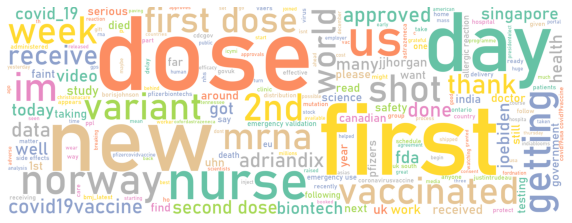

In [40]:
#data wordcloud
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(font_path="C:\\Windows\\Fonts\\Bahnschrift.ttf",
                      width = 1600,
                      height = 600,
                      collocations=True,
                      random_state = 123,
                      colormap='Set2',
                      background_color='white',
                      stopwords=STOPWORDS).generate(" ".join(data.text[0:200]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

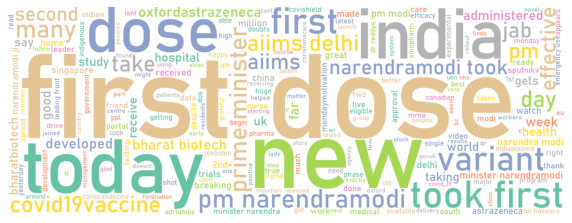

In [41]:
#positive wordcloud
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(font_path="C:\\Windows\\Fonts\\Bahnschrift.ttf",
                      width = 1600,
                      height = 600,
                      collocations=True,
                      random_state = 123,
                      colormap='Set2',
                      background_color='white',
                      stopwords=STOPWORDS).generate(" ".join(positive_data.text[0:200]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

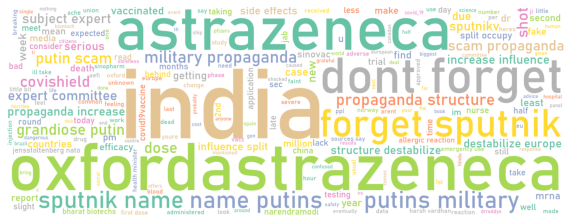

In [42]:
#negative wordcloud
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(font_path="C:\\Windows\\Fonts\\Bahnschrift.ttf",
                      width = 1600,
                      height = 600,
                      collocations=True,
                      random_state = 123,
                      colormap='Set2',
                      background_color='white',
                      stopwords=STOPWORDS).generate(" ".join(negative_data.text[0:200]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **MACHINE LEARNIG ANALYSIS**

In [43]:
data.head()

,user_location,text,Subjectivity,Polarity,Analysis
12,India,agency also released new information health ca...,0.454545,0.136364,Positive
75,India,ugursahin ozlemtureci muslim scientists husban...,0.000000,0.000000,Neutral
94,India,toronto receive ontarios 1st doses pfizer covi...,0.000000,0.000000,Neutral
100,Canada,pfizerbiontech wondering every pfizer employee...,0.000000,0.000000,Neutral
131,India,approvals pfizerbiontech vaccine singapore app...,0.333333,0.250000,Positive


In [44]:
#sepcifying data
#for positive and negative labels

labels = ['Positive', 'Negative']
data = data[data['Analysis'].isin(labels)]

In [45]:
data.head()

,user_location,text,Subjectivity,Polarity,Analysis
12,India,agency also released new information health ca...,0.454545,0.136364,Positive
131,India,approvals pfizerbiontech vaccine singapore app...,0.333333,0.250000,Positive
154,United Kingdom,vaccine mean im gon na eventually wear proper ...,0.393750,-0.156250,Negative
159,India,pfizervaccine unlikely available india mass di...,0.450000,-0.050000,Negative
220,Canada,canadian firm acuitas heart pfizerbiontech vac...,0.483333,0.233333,Positive


In [46]:
data.to_csv('ml_data.csv')

In [47]:
data2 = data[['text', 'Analysis']]
data2.head()

,text,Analysis
12,agency also released new information health ca...,Positive
131,approvals pfizerbiontech vaccine singapore app...,Positive
154,vaccine mean im gon na eventually wear proper ...,Negative
159,pfizervaccine unlikely available india mass di...,Negative
220,canadian firm acuitas heart pfizerbiontech vac...,Positive


In [48]:
#numeric labels
def label_num (x):
  if x == 'Positive':
    return 0
  if x == 'Negative':
    return 1

data2.Analysis = data2['Analysis'].apply(label_num)
# rename col
data2.rename(columns = {'Analysis': 'label'}, inplace = True)
data2.head()

,text,label
12,agency also released new information health ca...,0
131,approvals pfizerbiontech vaccine singapore app...,0
154,vaccine mean im gon na eventually wear proper ...,1
159,pfizervaccine unlikely available india mass di...,1
220,canadian firm acuitas heart pfizerbiontech vac...,0


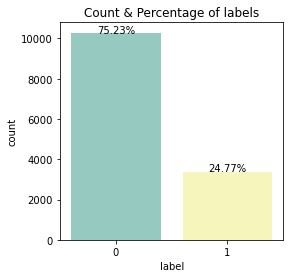

In [49]:
plot_count('label', 'labels', data2, 1)

In [50]:
#vectorizing
vect = TfidfVectorizer(ngram_range = (1,3)).fit(data2['text'])

In [51]:
feature_names = vect.get_feature_names()
print('Features: {}\n'.format(len(feature_names)))
print('First 20 features: \n {}'.format(feature_names[:20]))

Features: 291162

First 20 features: 
 ['000', '000 mass', '000 mass troops', '000000000000001', '000000000000001 worlds', '000000000000001 worlds population', '0001', '0001 according', '0001 according aafanational', '0001 risk', '0001 risk suspend', '0002', '0002 chance', '0002 chance killing', '0015', '0015 ifr', '0015 ifr 15', '002', '002 004', '002 004 thats']


In [52]:
# Feature variables
X = data2['text']
y = data2['label']
X = vect.transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)

In [54]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (9567, 291162)
X_test:  (4101, 291162)
y_train:  (9567,)
y_test:  (4101,)


In [55]:
data2['text']

12        agency also released new information health ca...
131       approvals pfizerbiontech vaccine singapore app...
154       vaccine mean im gon na eventually wear proper ...
159       pfizervaccine unlikely available india mass di...
220       canadian firm acuitas heart pfizerbiontech vac...
                                ...                        
669371    12 today government canada announced five new ...
669435    inoculation conducted 25 rajasthan districts d...
669492    dont know twisted keep making awesome plans ev...
669619    organo conducted covid vaccine drive antharama...
669630    first vaccination vacation keep family safe va...
Name: text, Length: 13668, dtype: object

### ***KNN***

In [56]:
#knn
# finding neighbors
# param_grid = {'n_neighbors': range(1,25)}
# Classifier = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
# Classifier.fit(X_train,y_train)
# classifier_pred = Classifier.predict(X_test)

# finding number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,15)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

#parameters
knn.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=4;, score=0.782 total time=   0.9s
[CV 2/5] END .....................n_neighbors=4;, score=0.781 total time=   0.9s
[CV 3/5] END .....................n_neighbors=4;, score=0.788 total time=   0.9s
[CV 4/5] END .....................n_neighbors=4;, score=0.786 total time=   1.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.786 total time=   0.9s
[CV 1/5] END .....................n_neighbors=8;, score=0.778 total time=   0.9s
[CV 2/5] END .....................n_neighbors=8;, score=0.785 total time=   0.9s
[CV 3/5] END .....................n_neighbors=8;, score=0.783 total time=   0.9s
[CV 4/5] END .....................n_neighbors=8;, score=0.786 total time=   0.9s
[CV 5/5] END .....................n_neighbors=8;, score=0.792 total time=   0.9s
[CV 1/5] END .....................n_neighbors=5;, score=0.785 total time=   0.9s
[CV 2/5] END .....................n_neighbors=5;

{'n_neighbors': 7}

In [57]:
#fitting train values
KNN_Classifier = KNeighborsClassifier(n_neighbors= 9).fit(X_train, y_train)

In [58]:
#prediction
KNN_prediction = KNN_Classifier.predict(X_test)

In [59]:
KNN_classifier_proba = KNN_Classifier.predict_proba(X_test)[::,1]

In [60]:
#confusion matrix
print(confusion_matrix(y_test,KNN_prediction))

[[2978  106]
 [ 754  263]]


In [61]:
#classificationi report
print(classification_report(y_test,KNN_prediction))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      3084
           1       0.71      0.26      0.38      1017

    accuracy                           0.79      4101
   macro avg       0.76      0.61      0.63      4101
weighted avg       0.78      0.79      0.75      4101



In [62]:
#accuracy
print(KNN_Classifier.score(X_test, y_test) * 100, "% Accuracy")

79.02950499878078 % Accuracy


### ***Naive Bayes***

In [63]:
#instanciating
nbclassifier = MultinomialNB()

#fitting
nbclassifier.fit(X_train, y_train)
#predicting
nbclassifier_prediction = nbclassifier.predict(X_test)

In [64]:
nb_classifier_proba = nbclassifier.predict_proba(X_test)[::,1]

In [65]:
#confusion matrix
print(confusion_matrix(y_test,nbclassifier_prediction))

[[3084    0]
 [ 993   24]]


In [66]:
#classification report
print(classification_report(y_test,nbclassifier_prediction))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3084
           1       1.00      0.02      0.05      1017

    accuracy                           0.76      4101
   macro avg       0.88      0.51      0.45      4101
weighted avg       0.82      0.76      0.66      4101



In [67]:
#accuracy
print(nbclassifier.score(X_test, y_test) * 100, "% Accuracy")

75.78639356254571 % Accuracy


### ***SVM***

In [68]:
#SVM
svm_classifier = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))

#fitting
svm_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100.0, class_weight='balanced', gamma=0.01,
                                  kernel='linear', probability=True))

In [69]:
#predicting
svm_classifier_prediction = svm_classifier.predict(X_test)

In [70]:
svm_classifier_proba = svm_classifier.predict_proba(X_test)[::,1]

In [71]:
#confusion matrix
print(confusion_matrix(y_test,svm_classifier_prediction))

[[3038   46]
 [ 484  533]]


In [72]:
#classification report
print(classification_report(y_test,svm_classifier_prediction))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3084
           1       0.92      0.52      0.67      1017

    accuracy                           0.87      4101
   macro avg       0.89      0.75      0.79      4101
weighted avg       0.88      0.87      0.86      4101



In [73]:
#accuracy
print(svm_classifier.score(X_test, y_test) * 100, "% Accuracy")

87.07632284808582 % Accuracy


### ***Logistic Regression***

In [74]:
#instanciating
lr_classifier = LogisticRegression()

#fitting
lr_classifier.fit(X_train, y_train)

#predicting
lr_classifier_prediction = lr_classifier.predict(X_test)

In [75]:
lr_classifier_proba = lr_classifier.predict_proba(X_test)[::,1]

In [76]:
#confusion matrix
print(confusion_matrix(y_test,lr_classifier_prediction))

[[3082    2]
 [ 974   43]]


In [77]:
#classification report
print(classification_report(y_test,lr_classifier_prediction))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3084
           1       0.96      0.04      0.08      1017

    accuracy                           0.76      4101
   macro avg       0.86      0.52      0.47      4101
weighted avg       0.81      0.76      0.67      4101



In [78]:
#accuracy
print(lr_classifier.score(X_test, y_test) * 100, "% Accuracy")

76.20092660326749 % Accuracy


In [79]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

#calc_precision_recall(y_test, y_pred_test)

In [80]:
%%time

def savePerformance(y_test, predictions, model, proba):    
    # Containers for true positive / false positive rates
    precision_scores = []
    recall_scores = []

    # Define probability thresholds to use, between 0 and 1
    probability_thresholds = np.linspace(0, 1, num=100)

    # Find true positive / false positive rate for each threshold
    for p in probability_thresholds:

        y_test_preds = []

        for prob in predictions:
            if prob > p:
                y_test_preds.append(1)
            else:
                y_test_preds.append(0)

        precision, recall = calc_precision_recall(y_test, y_test_preds)

        precision_scores.append(precision)
        recall_scores.append(recall)
    
    prerecall = pd.DataFrame(zip(precision_scores,recall_scores),columns=["precision","recall"])        
    prerecall.to_csv(f"{model}_precision&recall.csv")
    
    fpr, tpr, _ = roc_curve(y_test,  proba)    
    fprtpr = pd.DataFrame(zip(fpr,tpr), columns=["False Positive Rate","True Positive Rate"])        
    fprtpr.to_csv(f"{model}_roc_curve.csv")
    

# Save CSV files
savePerformance(y_test, KNN_prediction, "KNN", KNN_classifier_proba)
savePerformance(y_test, lr_classifier_prediction, "LogReg", lr_classifier_proba)
savePerformance(y_test, nbclassifier_prediction, "NB", nb_classifier_proba)
savePerformance(y_test, svm_classifier_prediction, "SVM", svm_classifier_proba)


Wall time: 1min 40s
